In [7]:
import sys 

!{sys.executable} -m pip install git+https://github.com/LAS-NCSU/openai-python

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/LAS-NCSU/openai-python to /tmp/pip-req-build-yhnmepjm
  Running command git clone --filter=blob:none --quiet https://github.com/LAS-NCSU/openai-python /tmp/pip-req-build-yhnmepjm
  Resolved https://github.com/LAS-NCSU/openai-python to commit 7d51076a27dfcef9dcc7b6abe942f8e05f29cf76
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [12]:
import openai
openai.las_api_token = "1c084df31dbda0b4db3fa78286af2c1efec0feb04fbd1df8cb29522afa21bb44"

# list models
models = openai.Model.list()

# print the first model's id
print(models.data[0].id)
for i in models.data:
    print(i.id)

babbage
babbage
text-davinci-003
davinci
text-davinci-edit-001
babbage-code-search-code
text-similarity-babbage-001
code-davinci-edit-001
text-davinci-001
ada
babbage-code-search-text
babbage-similarity
gpt-4-0314
gpt-3.5-turbo-16k-0613
code-search-babbage-text-001
text-curie-001
gpt-3.5-turbo-0301
gpt-3.5-turbo-16k
gpt-4
code-search-babbage-code-001
text-ada-001
text-similarity-ada-001
text-davinci-002
curie-instruct-beta
ada-code-search-code
ada-similarity
code-search-ada-text-001
text-search-ada-query-001
davinci-search-document
ada-code-search-text
text-search-ada-doc-001
davinci-instruct-beta
text-similarity-curie-001
code-search-ada-code-001
ada-search-query
text-search-davinci-query-001
curie-search-query
davinci-search-query
babbage-search-document
ada-search-document
text-search-curie-query-001
text-search-babbage-doc-001
whisper-1
curie-search-document
text-search-curie-doc-001
babbage-search-query
text-babbage-001
text-search-davinci-doc-001
text-search-babbage-query-001
cur

In [9]:
# create a chat completion
chat_completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": "Hello world"}], temperature = 0.7)

# print the chat completion
print(chat_completion.choices[0].message.content)

Hello! How can I assist you today?


In [14]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from tqdm import tqdm
import time
#load in the data
dataset = load_dataset("potsawee/wiki_bio_gpt3_hallucination")
#model_name = "gpt-3.5-turbo"
model_name = "gpt-4"
evaluations = []
for i in tqdm(range(len(dataset["evaluation"]))):
    article = dataset["evaluation"]["wiki_bio_text"][i]
    summary = dataset["evaluation"]["gpt3_text"][i]
    prompt = """Score the following summary given the corresponding article with respect to consistency from 1 to 10. Note that consistency measures how much information included in the summary is present in the source article. 10 points indicate the summary contains only statements that are entailed by the source document.
[Summary]: """ + summary + "\n" + "[Source Article]: " + article + "\n" + "Marks: "
    gotit = False
    while not gotit:
        try:
            chat_completion = openai.ChatCompletion.create(model=model_name, messages=[{"role": "user", "content": prompt}], temperature = 0)
            evaluations.append(chat_completion.choices[0].message.content)
            gotit = True
        except:
            print("messed up; trying again")
            time.sleep(1)
print(evaluations)
    
    


Found cached dataset parquet (/home/gforbes/.cache/huggingface/datasets/potsawee___parquet/potsawee--wiki_bio_gpt3_hallucination-9bba6a0f21f1b815/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
  8%|▊         | 18/238 [00:16<02:47,  1.32it/s]

messed up; trying again
messed up; trying again


  8%|▊         | 19/238 [00:19<05:22,  1.47s/it]

messed up; trying again
messed up; trying again
messed up; trying again


  8%|▊         | 20/238 [00:23<08:30,  2.34s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


  9%|▉         | 21/238 [00:28<11:33,  3.19s/it]

messed up; trying again
messed up; trying again


  9%|▉         | 22/238 [00:31<11:08,  3.10s/it]

messed up; trying again
messed up; trying again


 10%|▉         | 23/238 [00:34<11:03,  3.09s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 10%|█         | 24/238 [00:39<12:48,  3.59s/it]

messed up; trying again
messed up; trying again


 11%|█         | 25/238 [00:42<12:01,  3.39s/it]

messed up; trying again
messed up; trying again


 11%|█         | 26/238 [00:45<11:29,  3.25s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 11%|█▏        | 27/238 [00:49<12:36,  3.58s/it]

messed up; trying again
messed up; trying again


 12%|█▏        | 28/238 [00:52<12:00,  3.43s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 12%|█▏        | 29/238 [00:59<14:59,  4.30s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 13%|█▎        | 30/238 [01:03<14:50,  4.28s/it]

messed up; trying again
messed up; trying again


 13%|█▎        | 31/238 [01:06<13:24,  3.89s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 13%|█▎        | 32/238 [01:10<13:30,  3.93s/it]

messed up; trying again
messed up; trying again


 14%|█▍        | 33/238 [01:13<12:45,  3.73s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 14%|█▍        | 34/238 [01:18<13:18,  3.91s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 15%|█▍        | 35/238 [01:24<15:44,  4.65s/it]

messed up; trying again


 15%|█▌        | 36/238 [01:26<12:48,  3.80s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 16%|█▌        | 37/238 [01:31<14:13,  4.25s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 16%|█▌        | 38/238 [01:35<14:04,  4.22s/it]

messed up; trying again
messed up; trying again


 16%|█▋        | 39/238 [01:38<12:48,  3.86s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 17%|█▋        | 40/238 [01:43<13:33,  4.11s/it]

messed up; trying again


 17%|█▋        | 41/238 [01:45<11:33,  3.52s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 18%|█▊        | 42/238 [01:50<13:01,  3.99s/it]

messed up; trying again
messed up; trying again


 18%|█▊        | 43/238 [01:53<12:03,  3.71s/it]

messed up; trying again
messed up; trying again


 18%|█▊        | 44/238 [01:57<12:20,  3.82s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 19%|█▉        | 45/238 [02:05<16:13,  5.04s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 19%|█▉        | 46/238 [02:13<18:56,  5.92s/it]

messed up; trying again
messed up; trying again


 20%|█▉        | 47/238 [02:16<16:05,  5.06s/it]

messed up; trying again
messed up; trying again


 20%|██        | 48/238 [02:19<13:58,  4.41s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 21%|██        | 49/238 [02:24<14:42,  4.67s/it]

messed up; trying again
messed up; trying again


 21%|██        | 50/238 [02:27<13:11,  4.21s/it]

messed up; trying again
messed up; trying again


 21%|██▏       | 51/238 [02:32<13:05,  4.20s/it]

messed up; trying again
messed up; trying again


 22%|██▏       | 52/238 [02:35<12:01,  3.88s/it]

messed up; trying again
messed up; trying again


 22%|██▏       | 53/238 [02:38<11:29,  3.73s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 23%|██▎       | 54/238 [02:44<13:27,  4.39s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 23%|██▎       | 55/238 [02:48<13:18,  4.36s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 24%|██▎       | 56/238 [02:54<14:17,  4.71s/it]

messed up; trying again
messed up; trying again


 24%|██▍       | 57/238 [02:57<12:56,  4.29s/it]

messed up; trying again
messed up; trying again


 24%|██▍       | 58/238 [03:00<11:47,  3.93s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 25%|██▍       | 59/238 [03:05<12:06,  4.06s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 25%|██▌       | 60/238 [03:09<12:27,  4.20s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 26%|██▌       | 61/238 [03:13<12:21,  4.19s/it]

messed up; trying again
messed up; trying again


 26%|██▌       | 62/238 [03:16<11:18,  3.86s/it]

messed up; trying again
messed up; trying again


 26%|██▋       | 63/238 [03:20<11:00,  3.77s/it]

messed up; trying again


 27%|██▋       | 64/238 [03:22<09:35,  3.31s/it]

messed up; trying again
messed up; trying again


 27%|██▋       | 65/238 [03:25<09:19,  3.24s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 28%|██▊       | 66/238 [03:30<10:07,  3.53s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 28%|██▊       | 67/238 [03:39<15:28,  5.43s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 29%|██▊       | 68/238 [03:45<15:31,  5.48s/it]

messed up; trying again
messed up; trying again


 29%|██▉       | 69/238 [03:48<13:18,  4.73s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 29%|██▉       | 70/238 [03:52<13:02,  4.66s/it]

messed up; trying again
messed up; trying again


 30%|██▉       | 71/238 [03:55<11:33,  4.15s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 30%|███       | 72/238 [04:03<14:39,  5.30s/it]

messed up; trying again
messed up; trying again


 31%|███       | 73/238 [04:07<12:50,  4.67s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 31%|███       | 74/238 [04:12<13:13,  4.84s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 32%|███▏      | 75/238 [04:16<12:40,  4.66s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 32%|███▏      | 76/238 [04:20<11:59,  4.44s/it]

messed up; trying again
messed up; trying again


 32%|███▏      | 77/238 [04:23<10:36,  3.95s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 33%|███▎      | 78/238 [04:27<10:39,  4.00s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 33%|███▎      | 79/238 [04:32<11:05,  4.19s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 34%|███▎      | 80/238 [04:35<10:49,  4.11s/it]

messed up; trying again
messed up; trying again


 34%|███▍      | 81/238 [04:39<10:12,  3.90s/it]

messed up; trying again
messed up; trying again


 34%|███▍      | 82/238 [04:42<09:34,  3.68s/it]

messed up; trying again
messed up; trying again


 35%|███▍      | 83/238 [04:45<08:55,  3.45s/it]

messed up; trying again
messed up; trying again


 35%|███▌      | 84/238 [04:48<08:34,  3.34s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 36%|███▌      | 85/238 [04:52<09:15,  3.63s/it]

messed up; trying again
messed up; trying again


 36%|███▌      | 86/238 [04:56<08:51,  3.50s/it]

messed up; trying again
messed up; trying again


 37%|███▋      | 87/238 [04:59<08:57,  3.56s/it]

messed up; trying again
messed up; trying again


 37%|███▋      | 88/238 [05:02<08:34,  3.43s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 37%|███▋      | 89/238 [05:08<10:06,  4.07s/it]

messed up; trying again
messed up; trying again


 38%|███▊      | 90/238 [05:11<09:20,  3.79s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 38%|███▊      | 91/238 [05:16<10:07,  4.14s/it]

messed up; trying again
messed up; trying again


 39%|███▊      | 92/238 [05:19<09:21,  3.84s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 39%|███▉      | 93/238 [05:24<09:48,  4.06s/it]

messed up; trying again
messed up; trying again


 39%|███▉      | 94/238 [05:27<09:01,  3.76s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 40%|███▉      | 95/238 [05:31<09:17,  3.90s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 40%|████      | 96/238 [05:35<09:16,  3.92s/it]

messed up; trying again
messed up; trying again


 41%|████      | 97/238 [05:38<08:33,  3.64s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 41%|████      | 98/238 [05:42<08:52,  3.81s/it]

messed up; trying again
messed up; trying again


 42%|████▏     | 99/238 [05:45<08:09,  3.52s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 42%|████▏     | 100/238 [05:50<08:45,  3.81s/it]

messed up; trying again
messed up; trying again


 42%|████▏     | 101/238 [05:53<08:15,  3.62s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 43%|████▎     | 102/238 [05:58<09:22,  4.14s/it]

messed up; trying again


 43%|████▎     | 103/238 [06:00<07:46,  3.46s/it]

messed up; trying again
messed up; trying again


 44%|████▎     | 104/238 [06:03<07:26,  3.33s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 44%|████▍     | 105/238 [06:08<08:46,  3.96s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 45%|████▍     | 106/238 [06:13<08:54,  4.05s/it]

messed up; trying again
messed up; trying again


 45%|████▍     | 107/238 [06:16<08:07,  3.72s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 45%|████▌     | 108/238 [06:20<08:17,  3.83s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 46%|████▌     | 109/238 [06:24<08:46,  4.08s/it]

messed up; trying again
messed up; trying again


 46%|████▌     | 110/238 [06:27<08:00,  3.76s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 47%|████▋     | 111/238 [06:31<08:12,  3.88s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 47%|████▋     | 112/238 [06:36<08:21,  3.98s/it]

messed up; trying again
messed up; trying again


 47%|████▋     | 113/238 [06:39<07:47,  3.74s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 48%|████▊     | 114/238 [06:43<07:58,  3.86s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 48%|████▊     | 115/238 [06:48<08:48,  4.30s/it]

messed up; trying again
messed up; trying again


 49%|████▊     | 116/238 [06:53<08:49,  4.34s/it]

messed up; trying again
messed up; trying again


 49%|████▉     | 117/238 [06:56<08:04,  4.01s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 50%|████▉     | 118/238 [07:01<08:19,  4.16s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 50%|█████     | 119/238 [07:05<08:11,  4.13s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 50%|█████     | 120/238 [07:09<08:08,  4.14s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 51%|█████     | 121/238 [07:13<07:59,  4.10s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 51%|█████▏    | 122/238 [07:18<08:42,  4.51s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 52%|█████▏    | 123/238 [07:22<08:20,  4.36s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 52%|█████▏    | 124/238 [07:26<08:06,  4.27s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 53%|█████▎    | 125/238 [07:30<07:56,  4.21s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 53%|█████▎    | 126/238 [07:35<07:50,  4.20s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 53%|█████▎    | 127/238 [07:41<09:04,  4.91s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 54%|█████▍    | 128/238 [07:47<09:35,  5.23s/it]

messed up; trying again


 54%|█████▍    | 129/238 [07:49<07:39,  4.21s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 55%|█████▍    | 130/238 [07:53<07:26,  4.14s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 55%|█████▌    | 131/238 [07:57<07:24,  4.15s/it]

messed up; trying again
messed up; trying again


 55%|█████▌    | 132/238 [08:00<06:48,  3.85s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 56%|█████▌    | 133/238 [08:07<08:18,  4.75s/it]

messed up; trying again


 56%|█████▋    | 134/238 [08:09<06:54,  3.99s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 57%|█████▋    | 135/238 [08:13<06:53,  4.02s/it]

messed up; trying again
messed up; trying again


 57%|█████▋    | 136/238 [08:16<06:21,  3.74s/it]

messed up; trying again
messed up; trying again


 58%|█████▊    | 137/238 [08:19<05:56,  3.53s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 58%|█████▊    | 138/238 [08:28<08:17,  4.98s/it]

messed up; trying again
messed up; trying again


 58%|█████▊    | 139/238 [08:31<07:20,  4.45s/it]

messed up; trying again
messed up; trying again


 59%|█████▉    | 140/238 [08:34<06:36,  4.05s/it]

messed up; trying again
messed up; trying again


 59%|█████▉    | 141/238 [08:37<06:06,  3.77s/it]

messed up; trying again
messed up; trying again


 60%|█████▉    | 142/238 [08:40<05:38,  3.53s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 60%|██████    | 143/238 [08:44<05:50,  3.69s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 61%|██████    | 144/238 [08:48<05:58,  3.81s/it]

messed up; trying again


 61%|██████    | 145/238 [08:50<05:00,  3.23s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 61%|██████▏   | 146/238 [08:54<05:21,  3.49s/it]

messed up; trying again
messed up; trying again


 62%|██████▏   | 147/238 [08:58<05:12,  3.43s/it]

messed up; trying again
messed up; trying again


 62%|██████▏   | 148/238 [09:01<05:18,  3.54s/it]

messed up; trying again
messed up; trying again


 63%|██████▎   | 149/238 [09:06<05:47,  3.91s/it]

messed up; trying again


 63%|██████▎   | 150/238 [09:08<04:53,  3.33s/it]

messed up; trying again
messed up; trying again


 63%|██████▎   | 151/238 [09:11<04:44,  3.27s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 64%|██████▍   | 152/238 [09:16<05:09,  3.60s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 64%|██████▍   | 153/238 [09:20<05:20,  3.77s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 65%|██████▍   | 154/238 [09:24<05:31,  3.95s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 65%|██████▌   | 155/238 [09:32<06:59,  5.06s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 66%|██████▌   | 156/238 [09:37<07:00,  5.13s/it]

messed up; trying again


 66%|██████▌   | 157/238 [09:39<05:40,  4.21s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 66%|██████▋   | 158/238 [09:43<05:32,  4.16s/it]

messed up; trying again


 67%|██████▋   | 159/238 [09:45<04:36,  3.50s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 67%|██████▋   | 160/238 [09:52<05:47,  4.46s/it]

messed up; trying again
messed up; trying again


 68%|██████▊   | 161/238 [09:55<05:10,  4.03s/it]

messed up; trying again
messed up; trying again


 68%|██████▊   | 162/238 [09:58<04:50,  3.82s/it]

messed up; trying again
messed up; trying again


 68%|██████▊   | 163/238 [10:01<04:27,  3.57s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 69%|██████▉   | 164/238 [10:08<05:29,  4.45s/it]

messed up; trying again
messed up; trying again


 69%|██████▉   | 165/238 [10:11<04:56,  4.06s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 70%|██████▉   | 166/238 [10:20<06:29,  5.40s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 70%|███████   | 167/238 [10:24<06:00,  5.08s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 71%|███████   | 168/238 [10:28<05:34,  4.78s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 71%|███████   | 169/238 [10:33<05:42,  4.96s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 71%|███████▏  | 170/238 [10:39<05:43,  5.04s/it]

messed up; trying again
messed up; trying again


 72%|███████▏  | 171/238 [10:42<04:59,  4.47s/it]

messed up; trying again


 72%|███████▏  | 172/238 [10:43<04:02,  3.67s/it]

messed up; trying again
messed up; trying again


 73%|███████▎  | 173/238 [10:46<03:43,  3.43s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 73%|███████▎  | 174/238 [10:51<04:03,  3.81s/it]

messed up; trying again
messed up; trying again


 74%|███████▎  | 175/238 [10:54<03:46,  3.60s/it]

messed up; trying again
messed up; trying again


 74%|███████▍  | 176/238 [10:57<03:38,  3.52s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 74%|███████▍  | 177/238 [11:03<04:08,  4.07s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 75%|███████▍  | 178/238 [11:07<04:08,  4.14s/it]

messed up; trying again
messed up; trying again


 75%|███████▌  | 179/238 [11:10<03:44,  3.80s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 76%|███████▌  | 180/238 [11:15<03:51,  4.00s/it]

messed up; trying again
messed up; trying again


 76%|███████▌  | 181/238 [11:18<03:30,  3.70s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 76%|███████▋  | 182/238 [11:24<04:14,  4.54s/it]

messed up; trying again
messed up; trying again


 77%|███████▋  | 183/238 [11:27<03:50,  4.19s/it]

messed up; trying again
messed up; trying again


 77%|███████▋  | 184/238 [11:30<03:25,  3.80s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 78%|███████▊  | 185/238 [11:35<03:28,  3.93s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 78%|███████▊  | 186/238 [11:39<03:28,  4.01s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 79%|███████▊  | 187/238 [11:45<03:52,  4.56s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 79%|███████▉  | 188/238 [11:49<03:41,  4.42s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 79%|███████▉  | 189/238 [11:53<03:32,  4.34s/it]

messed up; trying again
messed up; trying again


 80%|███████▉  | 190/238 [11:56<03:09,  3.95s/it]

messed up; trying again
messed up; trying again


 80%|████████  | 191/238 [11:59<02:56,  3.75s/it]

messed up; trying again
messed up; trying again


 81%|████████  | 192/238 [12:02<02:42,  3.53s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 81%|████████  | 193/238 [12:07<02:49,  3.78s/it]

messed up; trying again
messed up; trying again


 82%|████████▏ | 194/238 [12:10<02:35,  3.52s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 82%|████████▏ | 195/238 [12:17<03:24,  4.75s/it]

messed up; trying again
messed up; trying again


 82%|████████▏ | 196/238 [12:20<02:58,  4.26s/it]

messed up; trying again
messed up; trying again


 83%|████████▎ | 197/238 [12:23<02:39,  3.88s/it]

messed up; trying again
messed up; trying again


 83%|████████▎ | 198/238 [12:26<02:25,  3.64s/it]

messed up; trying again
messed up; trying again


 84%|████████▎ | 199/238 [12:29<02:14,  3.45s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 84%|████████▍ | 200/238 [12:34<02:20,  3.70s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 84%|████████▍ | 201/238 [12:38<02:25,  3.94s/it]

messed up; trying again
messed up; trying again


 85%|████████▍ | 202/238 [12:41<02:13,  3.70s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 85%|████████▌ | 203/238 [12:47<02:30,  4.29s/it]

messed up; trying again
messed up; trying again


 86%|████████▌ | 204/238 [12:50<02:15,  3.99s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 86%|████████▌ | 205/238 [12:57<02:37,  4.78s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 87%|████████▋ | 206/238 [13:02<02:34,  4.82s/it]

messed up; trying again
messed up; trying again


 87%|████████▋ | 207/238 [13:05<02:12,  4.28s/it]

messed up; trying again
messed up; trying again


 87%|████████▋ | 208/238 [13:08<02:03,  4.10s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 88%|████████▊ | 209/238 [13:13<02:00,  4.14s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 88%|████████▊ | 210/238 [13:17<01:55,  4.13s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 89%|████████▊ | 211/238 [13:21<01:51,  4.11s/it]

messed up; trying again
messed up; trying again


 89%|████████▉ | 212/238 [13:25<01:45,  4.07s/it]

messed up; trying again


 89%|████████▉ | 213/238 [13:28<01:31,  3.66s/it]

messed up; trying again
messed up; trying again


 90%|████████▉ | 214/238 [13:31<01:23,  3.47s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 90%|█████████ | 215/238 [13:35<01:27,  3.81s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 91%|█████████ | 216/238 [13:40<01:29,  4.06s/it]

messed up; trying again
messed up; trying again


 91%|█████████ | 217/238 [13:43<01:19,  3.81s/it]

messed up; trying again
messed up; trying again


 92%|█████████▏| 218/238 [13:47<01:15,  3.79s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 92%|█████████▏| 219/238 [13:53<01:23,  4.38s/it]

messed up; trying again
messed up; trying again


 92%|█████████▏| 220/238 [13:56<01:11,  3.99s/it]

messed up; trying again
messed up; trying again


 93%|█████████▎| 221/238 [13:59<01:05,  3.87s/it]

messed up; trying again
messed up; trying again


 93%|█████████▎| 222/238 [14:02<00:58,  3.66s/it]

messed up; trying again
messed up; trying again


 94%|█████████▎| 223/238 [14:05<00:52,  3.47s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 94%|█████████▍| 224/238 [14:11<00:56,  4.03s/it]

messed up; trying again
messed up; trying again


 95%|█████████▍| 225/238 [14:14<00:48,  3.75s/it]

messed up; trying again
messed up; trying again


 95%|█████████▍| 226/238 [14:17<00:43,  3.62s/it]

messed up; trying again
messed up; trying again


 95%|█████████▌| 227/238 [14:20<00:38,  3.51s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 96%|█████████▌| 228/238 [14:25<00:38,  3.80s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 96%|█████████▌| 229/238 [14:29<00:35,  3.99s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 97%|█████████▋| 230/238 [14:34<00:32,  4.05s/it]

messed up; trying again
messed up; trying again
messed up; trying again


 97%|█████████▋| 231/238 [14:38<00:28,  4.05s/it]

messed up; trying again
messed up; trying again


 97%|█████████▋| 232/238 [14:41<00:22,  3.79s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 98%|█████████▊| 233/238 [14:46<00:21,  4.34s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 98%|█████████▊| 234/238 [14:51<00:18,  4.56s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


 99%|█████████▊| 235/238 [14:57<00:14,  4.79s/it]

messed up; trying again
messed up; trying again


 99%|█████████▉| 236/238 [15:00<00:08,  4.24s/it]

messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again
messed up; trying again


100%|█████████▉| 237/238 [15:07<00:05,  5.06s/it]

messed up; trying again
messed up; trying again


100%|██████████| 238/238 [15:10<00:00,  3.83s/it]

['1', '1/10', '4/10', '1/10', '4.5', '4', '1/10', '7.5', '5.5', '5.5', '6.5', '7.5', '1/10', '7.5', '5.5', '4.5', '1/10', '10', '5.5', '8.5', '4', '1', '7.5', '5.5', '1', '1', '8.5', '5.5', '8.5', '5.5', '1', '1', '4.5', '1/10', '4.5', '1', '3', '4/10', '4.5', '6.5', '9.5', '4/10', '6.5', '1', '4/10', '1', '7.5', '10', '9.5', '4.5', '3/10', '1/10', '9.5', '7.5', '7.5', '1/10', '1', '4/10', '1/10', '4/10', '5.5', '6.5', '7.5', '3/10', '1/10', '6.5', '1', '1/10', '4', '7.5', '4', '7.5', '9.5', '1/10', '10', '1', '1', '9.5', '5.5', '1', '8.5', '5.5', '4/10', '7.5', '4', '1/10', '5.5', '4', '7.5', '1', '4.5', '3/10', '6.5', '3/10', '8.5', '2', '3/10', '5.5', '5.5', '6.5', '5', '1/10', '9.5', '8.5', '8.5', '5.5', '3/10', '7.5', '9.5', '9.5', '2', '1/10', '8.5', '1/10', '1/10', '7.5', '1/10', '7.5', '3', '6.5', '8.5', '3/10', '2', '2/10', '1', '4', '9.5', '6.5', '3/10', '1', '1', '7.5', '1/10', '1/10', '7.5', '10', '6.5', '4/10', '9.5', '7.5', '7.5', '1/10', '7.5', '2', '4', '5', '9.5', '2/1

In [22]:
#converts strings to floats, while properly handling things like "3/10" and the like.
evaluations_fixed = []
for i in range(len(evaluations)):
    if "/" in evaluations[i]:
        evaluations_fixed.append(float(evaluations[i][0]))
    else:
        evaluations_fixed.append(float(evaluations[i]))
evaluations_fixed

[1.0,
 1.0,
 4.0,
 1.0,
 4.5,
 4.0,
 1.0,
 7.5,
 5.5,
 5.5,
 6.5,
 7.5,
 1.0,
 7.5,
 5.5,
 4.5,
 1.0,
 10.0,
 5.5,
 8.5,
 4.0,
 1.0,
 7.5,
 5.5,
 1.0,
 1.0,
 8.5,
 5.5,
 8.5,
 5.5,
 1.0,
 1.0,
 4.5,
 1.0,
 4.5,
 1.0,
 3.0,
 4.0,
 4.5,
 6.5,
 9.5,
 4.0,
 6.5,
 1.0,
 4.0,
 1.0,
 7.5,
 10.0,
 9.5,
 4.5,
 3.0,
 1.0,
 9.5,
 7.5,
 7.5,
 1.0,
 1.0,
 4.0,
 1.0,
 4.0,
 5.5,
 6.5,
 7.5,
 3.0,
 1.0,
 6.5,
 1.0,
 1.0,
 4.0,
 7.5,
 4.0,
 7.5,
 9.5,
 1.0,
 10.0,
 1.0,
 1.0,
 9.5,
 5.5,
 1.0,
 8.5,
 5.5,
 4.0,
 7.5,
 4.0,
 1.0,
 5.5,
 4.0,
 7.5,
 1.0,
 4.5,
 3.0,
 6.5,
 3.0,
 8.5,
 2.0,
 3.0,
 5.5,
 5.5,
 6.5,
 5.0,
 1.0,
 9.5,
 8.5,
 8.5,
 5.5,
 3.0,
 7.5,
 9.5,
 9.5,
 2.0,
 1.0,
 8.5,
 1.0,
 1.0,
 7.5,
 1.0,
 7.5,
 3.0,
 6.5,
 8.5,
 3.0,
 2.0,
 2.0,
 1.0,
 4.0,
 9.5,
 6.5,
 3.0,
 1.0,
 1.0,
 7.5,
 1.0,
 1.0,
 7.5,
 10.0,
 6.5,
 4.0,
 9.5,
 7.5,
 7.5,
 1.0,
 7.5,
 2.0,
 4.0,
 5.0,
 9.5,
 2.0,
 4.5,
 1.0,
 1.0,
 7.5,
 1.0,
 5.5,
 1.0,
 3.0,
 3.0,
 1.0,
 8.5,
 4.0,
 5.5,
 1.0,
 4.0,
 3.0,
 4.0,
 1.0,


In [22]:
def evaluate_sentiment(temperature = .7, num_workers = 10, sentence_index = 0, prompt = "the sentiment of this sentence", modified = False):
    if modified:
        full_prompt = """Evaluate the sentiment of this sentence on a scale of 0-100, with 0 being the most negative possible sentiment and 100 being the most positive sentiment possible. Answer with a number only, and no accompanying text. Make sure your answer is """
        prompt2 = "The sentence: "     
        adjectives = ["accurate","nuanced", "honest","specific","thoughtful","realistic","humanlike","not a multiple of 5","not too extreme","correct"]
    if not modified:
        full_prompt = """Evaluate the sentiment of this sentence on a scale of 0-100, with 0 being the most negative possible sentiment and 100 being the most positive sentiment possible. Answer with a number only, and no accompanying text. The sentence: """
    print(sentence_list[sentence_index], label_dict[sentence_list[sentence_index]])
    evaluations = []
    for i in range(num_workers):
        gotit = False
        while not gotit:
            try:
                if modified:
                    chat_completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": full_prompt+adjectives[i]+". The sentence: "+'"'+sentence_list[sentence_index]+'"'}], temperature = temperature)
                else:
                    chat_completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": full_prompt+'"'+sentence_list[sentence_index]+'"'}], temperature = temperature)
                # print the chat completion
                evaluations.append(chat_completion.choices[0].message.content)
                gotit = True
            except:
                time.sleep(1)
    for i in range(len (evaluations)):
        evaluations[i] = int(''.join(filter(str.isdigit, evaluations[i])))
    return evaluations
        
    

In [25]:
evaluate_sentiment(sentence_index = 2, temperature = 0.0)

The weather ruined our outdoor picnic; it started raining heavily. 30


['10', '10', '10', '10', '10', '10', '10', '10', '10', '10']

The concert was a complete disaster; the sound quality was terrible. 18
[10]
The vacation was a dream come true; I experienced pure bliss on the sandy beaches. 97
[95]
I'm exhausted after working non-stop for 12 hours; I need a break. 31
[20]
I'm annoyed by the constant interruptions during my work meetings. 28
[10]
The painting exhibition was a visual masterpiece; each piece was a work of art. 78
[95]
I can't stand the constant noise from the construction site near my apartment. 13
[10]
The traffic during rush hour is somewhat annoying, but it's expected in a busy city. 48
[50]
I'm frustrated with myself for making the same mistake over and over again. 18
[10]
I'm deeply saddened by the news of the natural disaster affecting thousands of people. 20
[10]
I'm overjoyed to have won the competition; it's a dream come true. 96
[100]
I'm grateful for the support and encouragement I receive from my loved ones. 85
[95]
The coffee at the new café was alright; it didn't wow me, but it was drink

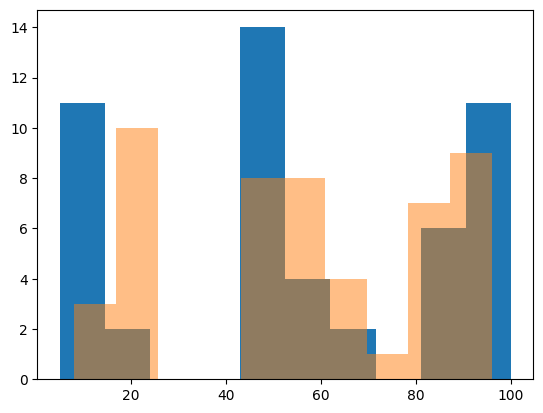

In [25]:
import matplotlib.pyplot as plt
import time
ratings = []#label_dict.values()
estimates = []
offset = 0
for i in range(50-offset):
    estimate = evaluate_sentiment(temperature = .7, num_workers = 1, sentence_index = i+offset)
    print(estimate)
    estimates.append(estimate[0])
    ratings.append(label_dict_mean[sentence_list[i+offset]])
    #time.sleep(1)
est = []
for i in estimates:
    est.append(int(i))
rat = []
for i in ratings:
    rat.append(int(i))
plt.hist(est)
plt.hist(rat, alpha = .5)
plt.show()


In [22]:
import copy
est_temp0 = copy.deepcopy(est)

The play was decently entertaining; it had its moments, but it didn't leave a lasting impression. 51
[60, 50, 60, 60, 60, 60, 65, 60, 60, 60]
The charity event was heartwarming; seeing so many people come together to help others was inspiring. 89
[95, 90, 90, 95, 90, 95, 90, 85, 90, 90]
The traffic jam was unbearable; it took me hours to reach my destination. 26
[0, 10, 10, 5, 10, 10, 5, 10, 10, 5]
I'm exhausted after working non-stop for 12 hours; I need a break. 31
[10, 20, 10, 10, 10, 10, 20, 15, 20, 20]
The new smartphone features are impressive; I can't wait to get my hands on it. 72
[90, 90, 90, 90, 90, 90, 90, 85, 90, 90]
I'm impressed by the level of professionalism displayed by the employees at the company. 69
[90, 90, 90, 90, 90, 95, 90, 85, 90, 90]
The customer support was adequate; they resolved my issue, but it took longer than expected. 52
[50, 60, 60, 60, 60, 50, 60, 73, 60, 70]
The restaurant served the most delicious food I've ever tasted; it was a culinary delight. 93

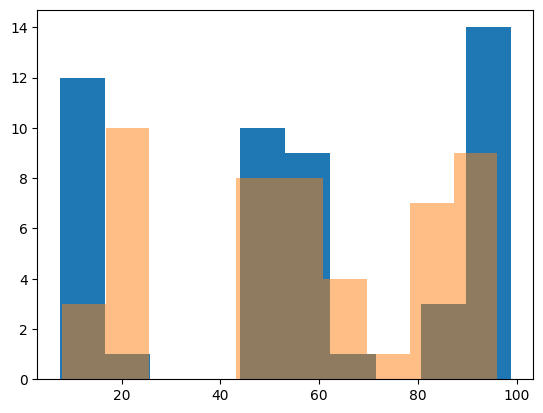

In [6]:
import matplotlib.pyplot as plt
import time
ratings = []#label_dict_mean.values()
estimates = []
offset = 0
num_workers = 10
for i in range(50-offset):
    estimate = evaluate_sentiment(temperature = 0.7, num_workers = num_workers, sentence_index = i+offset)
    print(estimate)
    estimates.append(sum(estimate))
    ratings.append(label_dict_mean[sentence_list[i+offset]])
#    time.sleep(1)
est = []
for i in estimates:
    est.append(int(i)/num_workers)
rat = []
for i in ratings:
    rat.append(int(i))
plt.hist(est)
plt.hist(rat, alpha = .5)
plt.show()


In [41]:
est_temp_07 = copy.deepcopy(est)

The concert was good, but it lacked the energy and excitement I was hoping for. 55
[65, 60, 60, 60, 65, 55, 50, 60, 55, 55]
The customer support was adequate; they resolved my issue, but it took longer than expected. 52
[55, 65, 50, 75, 50, 60, 50, 60, 60, 60]
The service at the hotel was satisfactory; it met my basic needs but didn't exceed expectations. 50
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
I'm devastated by the loss of my beloved pet; they were my best friend. 11
[10, 10, 10, 10, 10, 10, 10, 10, 8, 10]
I'm impressed by the level of professionalism displayed by the employees at the company. 69
[90, 95, 95, 85, 100, 90, 90, 90, 90, 95]
I can't stand the constant noise from the construction site near my apartment. 13
[0, 1, 10, 15, 5, 10, 10, 0, 10, 10]
The book was incredibly boring; I couldn't even finish reading it. 31
[10, 5, 10, 5, 10, 10, 10, 5, 10, 5]
The traffic during rush hour is somewhat annoying, but it's expected in a busy city. 48
[50, 40, 60, 45, 55, 50, 45, 60, 45

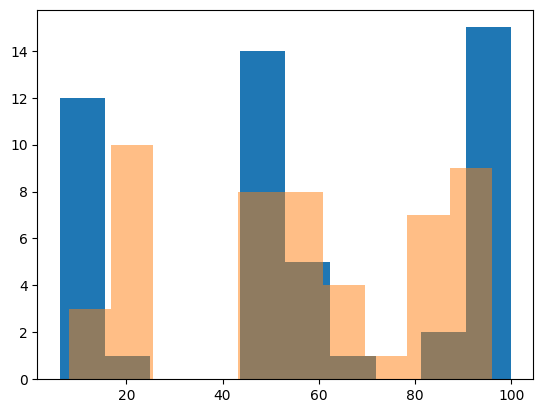

In [49]:
import matplotlib.pyplot as plt
import time
ratings = []#label_dict_mean.values()
estimates = []
offset = 0
num_workers = 10
for i in range(50-offset):
    estimate = evaluate_sentiment(temperature = 1.3, num_workers = num_workers, sentence_index = i+offset)
    print(estimate)
    estimates.append(sum(estimate))
    ratings.append(label_dict_mean[sentence_list[i+offset]])
#    time.sleep(1)
est = []
for i in estimates:
    est.append(int(i)/num_workers)
rat = []
for i in ratings:
    rat.append(int(i))
plt.hist(est)
plt.hist(rat, alpha = .5)
plt.show()


[[1.         0.97913925]
 [0.97913925 1.        ]]


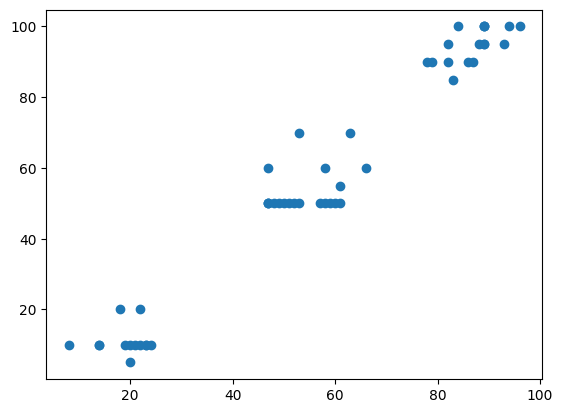